In [42]:
import math
import numpy as np

In [43]:
x_train =    [[4.9176,1,3.472,0.998,1,7,4,42,],[5.0208,1,3.531,1.5,2,7,4,62],[4.5429,1,2.275,1.175,1,6,3,40],
                [4.5573,1,4.05,1.232,1,6,3,54,],[5.0597,1,4.455,1.121,1,6,3,42,],[3.891,1,4.455,0.988,1,6,3,56],
                [5.898,1,5.85,1.24,1,7,3,51],[5.6039,1,9.52,1.501,0,6,3,32],[16.4202,2.5,9.8,3.42,2,10,5,42],
                [14.4598,2.5,12.8,3,2,9,5,14,],[5.8282,1,6.435,1.225,2,6,3,32],[5.3003,1,4.9883,1.552,1,6,3,30],
                [6.2712,1,5.52,0.975,1,5,2,30],[5.9592,1,6.666,1.121,2,6,3,32],[5.05,1,5,1.02,0,5,2,46,],
                [5.6039,1,9.52,1.501,0,6,3,32],[8.2464,1.5,5.15,1.664,2,8,4,50,],[6.6969,1.5,6.902,1.488,1.5,7,3,22],
                [7.7841,1.5,7.102,1.376,1,6,3,17],[9.0384,1,7.8,1.5,1.5,7,3,23,]]

y_train =    [  ['Apartment'],['House'],['Condo'],['Apartment'],
                ['Apartment'],['Condo'],['Condo'],['House'],
                ['Condo'],['Apartment'],['House'],['House'],
                ['House'],['Condo'],['Apartment'],['House'],
                ['Apartment'],['House'],['Condo'],['Apartment']]

In [44]:
x_test = [   [6.0931,1.5,6.7265,1.652,1,6,3,44],[8.3607,1.5,9.15,1.777,2,8,4,48],
             [8.14,1,8,1.504,2,7,3,3],[9.1416,1.5,7.3262,1.831,1.5,8,4,31],
             [12,1.5,5,1.2,2,6,3,30]]

In [45]:
y_test = [['Apartment'], ['House'], ['House'], ['Apartment'], ['Apartment']]


In [46]:
distance = []
sorted_prediction = []

In [47]:
for input in range(5):

    temp = []

    for i in range(20):
        #find Euclidean Distance

        temp.append(np.linalg.norm(np.array(x_train[i]) - np.array(x_test[input])))

    distance.append(temp)
    myDict = {key: temp.index(key) for key in temp}
    temp.sort()

    sorted = []
    for i in range(20):
        sorted.append(myDict.get(temp[i]))
    sorted_prediction.append(sorted)
    

In [48]:
sorted_prediction_search = []

In [49]:
for i in range(5):
    
    temp_list = []
    for pred in range(20):
        
        temp_list.append(y_train[sorted_prediction[i][pred]])
    
    sorted_prediction_search.append(temp_list)

In [50]:
def predictions(k):

    wrong = 0
    correct = 0
    tie = 0
    accuracy = 0
    
    for input in range(5):
        apartment_no = 0
        condo_no = 0
        house_no = 0
        prediction = ""
    
        for i in range(k):
            
            pred = sorted_prediction[input][i]
            
            if (pred >= 0 and pred <=6):
                apartment_no += 1
                
            elif (pred >= 7 and pred <=12):
                condo_no += 1
            
            elif (pred >= 13 and pred <=19):
                house_no += 1
        
        if (apartment_no > condo_no and apartment_no > house_no):
            prediction = 'Apartment'
        elif (house_no > apartment_no and house_no > condo_no):
            prediction = 'House'
        elif (condo_no > apartment_no and condo_no > house_no):
            prediction = 'House'
        else:
            prediction = 'tie'
            
        
        if (prediction == y_test[input][0]):
            correct += 1
        elif (prediction == 'tie'):
            tie +=1
        else:
            wrong += 1
        
        print(f"Input number {input}:")
        print(f'Apartment Votes: {apartment_no}')
        print(f'House Votes: {house_no}')
        print(f'Condo Votes: {condo_no}')
        print(f"Class Prediction: {prediction}")
        print('\n')
        
    accuracy = correct / 5
    
    print(f'Summary: \nk = {k}')
    print(f'Correct: {correct}')
    print(f'Wrong: {wrong}')
    print(f'Uncertain: {tie}')
    print(f'Test Accuracy: {accuracy}\n\n')
    
    return accuracy

In [51]:
accuracies = []

for i in range(20):
    accuracies.append(predictions(i + 1))

Input number 0:
Apartment Votes: 1
House Votes: 0
Condo Votes: 0
Class Prediction: Apartment


Input number 1:
Apartment Votes: 0
House Votes: 1
Condo Votes: 0
Class Prediction: House


Input number 2:
Apartment Votes: 0
House Votes: 0
Condo Votes: 1
Class Prediction: House


Input number 3:
Apartment Votes: 0
House Votes: 1
Condo Votes: 0
Class Prediction: House


Input number 4:
Apartment Votes: 0
House Votes: 0
Condo Votes: 1
Class Prediction: House


Summary: 
k = 1
Correct: 3
Wrong: 2
Uncertain: 0
Test Accuracy: 0.6


Input number 0:
Apartment Votes: 1
House Votes: 1
Condo Votes: 0
Class Prediction: tie


Input number 1:
Apartment Votes: 1
House Votes: 1
Condo Votes: 0
Class Prediction: tie


Input number 2:
Apartment Votes: 0
House Votes: 1
Condo Votes: 1
Class Prediction: tie


Input number 3:
Apartment Votes: 0
House Votes: 1
Condo Votes: 1
Class Prediction: tie


Input number 4:
Apartment Votes: 0
House Votes: 1
Condo Votes: 1
Class Prediction: tie


Summary: 
k = 2
Correct: 0

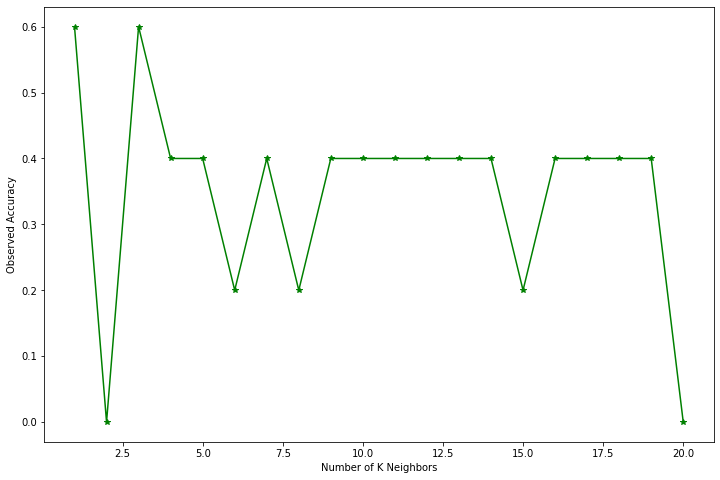

In [52]:
import matplotlib.pyplot as plt

num_interval = np.linspace(1, 20, 20)

plt.figure(figsize = (12,8))
plt.plot(num_interval, accuracies , marker='*', color='green')

plt.ylabel("Observed Accuracy")
plt.xlabel("Number of K Neighbors")
plt.show()